**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


In [145]:
plt.style.use('classic')
random.seed(50)

## import train and test data for Classification

In [146]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [147]:
# take absolute value
C_train = C_train.astype(int)
C_train['Polarization_bool'] = C_train['Polarization_bool']
C_test = C_test.astype(int)
C_test['Polarization_bool'] = C_test['Polarization_bool']


In [148]:
C_test.head()
C_train.head()

,Polarization_bool,retweetCount
0,-1,450
1,-1,1593
2,-1,1062
3,-1,260
4,1,271


## Drop nan for classification Data

In [149]:
C_train =C_train.dropna()
C_test.isna().sum()

Polarization_bool    0
retweetCount         0
dtype: int64

## import train and test data for Regression

In [150]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/stats201-prediction-Colden/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [151]:
R_train.isna().sum()
R_train=R_train.dropna()
R_test.isna().sum()

Polarization_bool    0
retweetCount         0
dtype: int64

In [152]:
R_train = R_train.astype(int)
R_test = R_test.astype(int)
R_train['Polarization_bool'] = R_train['Polarization_bool']
R_test['Polarization_bool'] = R_test['Polarization_bool']
R_train.head()
R_test.head()

,Polarization_bool,retweetCount
668,1,244
669,-1,1735
670,-1,1296
671,-1,651
672,-1,1623


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [153]:
C_train.head()

,Polarization_bool,retweetCount
0,-1,450
1,-1,1593
2,-1,1062
3,-1,260
4,1,271


In [154]:
X_train = pd.DataFrame(np.array(C_train['retweetCount']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['Polarization_bool'].astype(int))

In [155]:
C_test.head()

,Polarization_bool,retweetCount
668,1,244
669,-1,1735
670,-1,1296
671,-1,651
672,-1,1623


In [156]:
X_test = pd.DataFrame(np.array(C_test['retweetCount']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['Polarization_bool'].astype(int))

## Import base packages

In [157]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [158]:
from sklearn.tree import DecisionTreeClassifier

In [159]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [160]:
y_pred= mdl.predict(X_test)
y_pred

array([-1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  0, -1,  1,  1, -1,
        0,  0,  0,  1,  1,  1, -1, -1, -1, -1,  0,  1, -1,  1,  1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  0, -1,  0,  1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1,  1,  1,  0,  0, -1, -1, -1, -1,  0, -1,  1,  0, -1,
        1,  1,  1, -1,  0,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1,  0,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  0, -1,  0, -1,  0,
       -1,  1,  0,  1, -1,  0, -1,  1,  1,  0, -1, -1,  1,  0,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  0,  1,  0,  1, -1, -1,  1,  1, -1,  1,
        1,  0, -1, -1, -1,  1, -1, -1,  1,  1,  0,  1, -1, -1,  0, -1,  1,
       -1, -1,  1,  0, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  0,  1,  0,  1,
        1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  0,  1,
        1, -1, -1, -1, -1,  1, -1,  1,  0, -1,  1, -1,  1,  1, -1, -1, -1,
        1,  1,  1, -1, -1

## Evaluations

In [161]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.36      0.36      0.36       137
           0       0.20      0.18      0.19        49
           1       0.43      0.45      0.44       147

    accuracy                           0.37       333
   macro avg       0.33      0.33      0.33       333
weighted avg       0.37      0.37      0.37       333



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


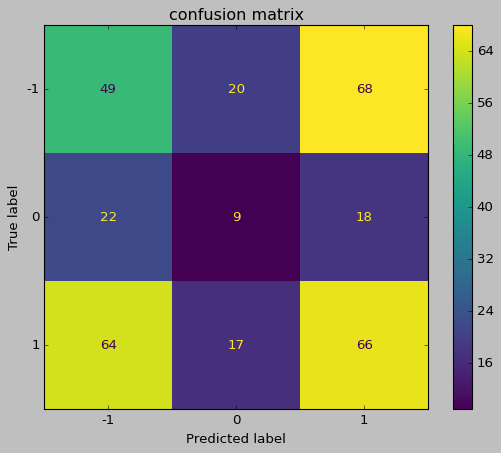

In [162]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [163]:
# plot_roc_curve(mdl, X_test, y_test)
# plt.grid()
# plt.title('ROC Curve')
# plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [164]:
from sklearn.ensemble import RandomForestClassifier

In [165]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-165-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [166]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.38      0.33      0.35       137
           0       0.18      0.16      0.17        49
           1       0.44      0.50      0.47       147

    accuracy                           0.38       333
   macro avg       0.33      0.33      0.33       333
weighted avg       0.37      0.38      0.38       333



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


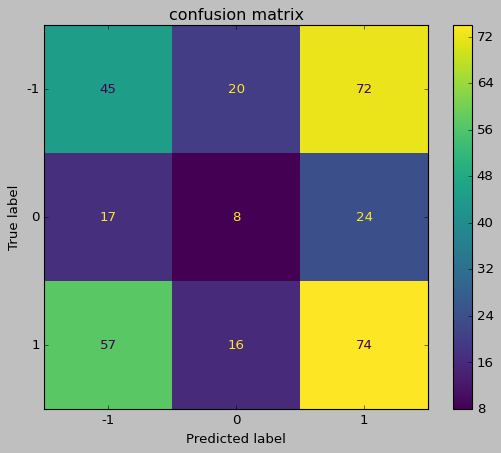

In [167]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

In [168]:
# plot_roc_curve(mdl, X_test, y_test)
# plt.grid()
# plt.title('ROC Curve')
# plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [169]:
from sklearn.neural_network import MLPClassifier

In [170]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.41      1.00      0.58       137
           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00       147

    accuracy                           0.41       333
   macro avg       0.14      0.33      0.19       333
weighted avg       0.17      0.41      0.24       333



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


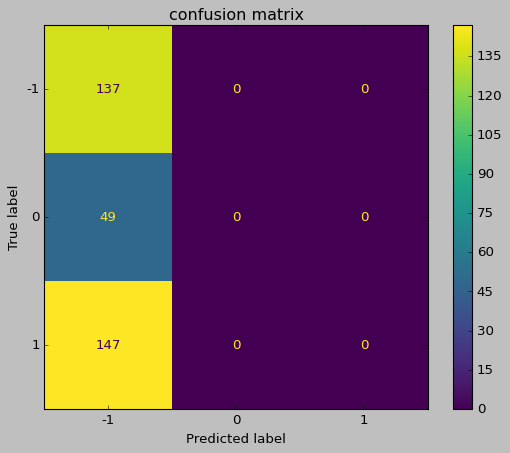

In [172]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [173]:
#!pip install autogluon
from autogluon.tabular import TabularDataset, TabularPredictor

In [174]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [175]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [176]:
# take absolute value of data to use autogluon
C_train = C_train.astype(int)
C_train['Polarization_bool'] = C_train['Polarization_bool'].abs()
C_test = C_test.astype(int)
C_test['Polarization_bool'] = C_test['Polarization_bool'].abs()
# take absolute value
R_train = R_train.astype(int)
R_test = R_test.astype(int)
R_train['Polarization_bool'] = R_train['Polarization_bool'].abs()
R_test['Polarization_bool'] = R_test['Polarization_bool'].abs()
R_train.head()
R_test.head()


,Polarization_bool,retweetCount
668,1,244
669,1,1735
670,1,1296
671,1,651
672,1,1623


In [177]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.7.0
Python Version:     3.8.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Dec 10 16:00:40 UTC 2022
Train Data Rows:    668
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	3 unique label values:  [-1, 1, 0]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10771.69 MB
	Train Data (Original)  Memory Usage: 0.01 MB (0.0% of available memory)
	Inferring data type of each feature

In [178]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")

In [179]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
#predictor.leaderboard(silent=True, data=test_data,extra_metrics=['accuracy','precision','recall','acc','f1'])

# Machine Learning Regression

## important global packages

In [192]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [193]:
R_train.head()

,Polarization_bool,retweetCount
0,1,450
1,1,1593
2,1,1062
3,1,260
4,1,271


In [194]:
X_train = pd.DataFrame(R_train['retweetCount'])
y_train = pd.DataFrame(R_train['Polarization_bool'])

In [195]:
R_test.head()

,Polarization_bool,retweetCount
668,1,244
669,1,1735
670,1,1296
671,1,651
672,1,1623


In [196]:
X_test = pd.DataFrame(R_test['retweetCount'])
y_test = pd.DataFrame(R_test['Polarization_bool'])

## Random Forest Regression

In [197]:
from sklearn.ensemble import RandomForestRegressor

In [198]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-198-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [199]:
# calculate R2
from sklearn.metrics import r2_score

In [200]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.38223707311625654


In [201]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,1.00
1,1.00
2,0.95
3,0.92
4,1.00
...,...
328,1.00
329,0.96
330,0.99
331,1.00


R-squared: 0.0016373127346813732


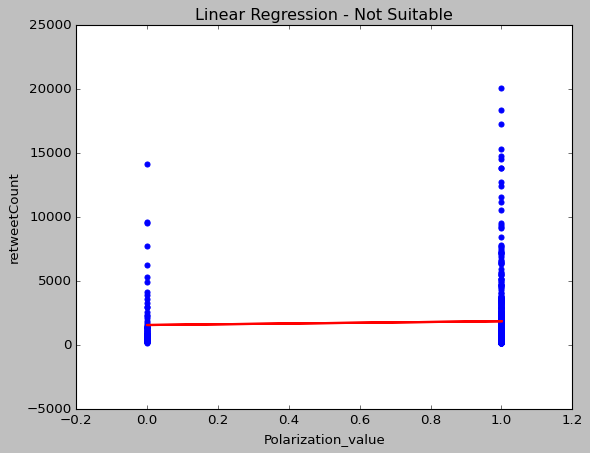

In [206]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load data into a pandas DataFrame
df = R_train

# Extract the features and target variables
X = df['Polarization_bool'].values.reshape(-1, 1)
y = df['retweetCount'].values

# Train a linear regression model
reg = LinearRegression().fit(X, y)

# Use the model to make predictions
y_pred = reg.predict(X)

# Calculate the R-squared value of the model
r2 = reg.score(X, y)

# Print the R-squared value
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('Linear Regression - Not Suitable')
plt.xlabel('Polarization_value')
plt.ylabel('retweetCount')
plt.show()


<ipython-input-207-05543b94f034>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


R-squared: -0.3961911963021143


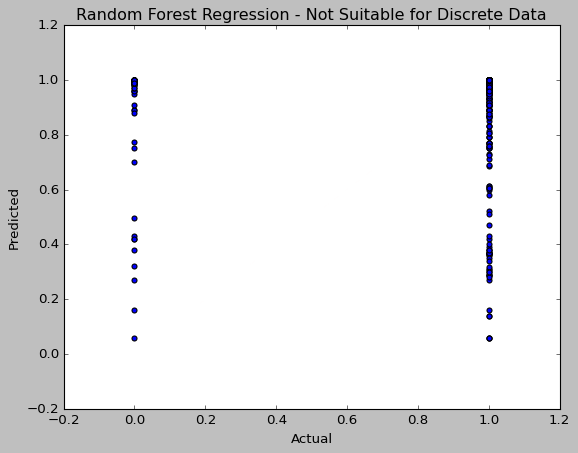

In [207]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Train a random forest regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate the R-squared value of the model on the test set
r2 = reg.score(X_test, y_test)

# Print the R-squared value
print(f'R-squared: {r2}')

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'r--', linewidth=.0001)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression - Not Suitable for Discrete Data')
plt.show()
